# Dataset description and classification

The aim of this little project is to classify different species of the Iris flower. The used data set is included from pythons sklearn.( That is similar to https://www.kaggle.com/uciml/iris )
Convert to a **binary classification** problem. Idea: some tasks can have target variables
with multiple possible values. For example, there can be a handwritten digit
classification problem - target variable has 26 possible classes. Or a digit recognition
problem - 10 possible classes. We need to convert them to a binary formulation - with
classes 0 and 1. This can be done in several ways: one vs rest (we call class A - 0 and all
others B-Z - 1) or by some specific principle (for example, odd and even: 0,2,4,6,8 - will
get class 0, all others - class 1), etc.

In [21]:
import os
os.path
import numpy as np
import cv2
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In case you have collided with **ModuleNotFoundError: No module named 'cv2'** 
```
pip install opencv-python
```

In [22]:
plt.style.use('ggplot')

Loading the Dataset from sklearn and exploring the data

In [23]:
iris = datasets.load_iris()

In [24]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [26]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
iris.data.shape

(150, 4)

In [29]:
np.unique(iris.target)

array([0, 1, 2])

We have a dataset with 150 points, each having four feature values. These feature values correspond to the feature names 
 
 - 'sepal length (cm)'
 - 'sepal width (cm)'
 - 'petal length (cm)'
 - 'petal width (cm)'
 
With these features we are trying to classify each data point to one of the three target categories:
 
 - 'setosa'
 - 'versicolor'
 - 'virginica'

<h1><center>setosa</center></h1>
<img src="images/setosa.jpg" width=240 height=240 />
<h1><center>versicolor</center></h1>
<img src="images/versicolor.jpg" width=240 height=240 />
<h1><center>virginica</center></h1>
<img src="images/virginica.jpg" width=240 height=240 />

## Binary Classification Problem

In [32]:
idx = iris.target != 1
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

Let's do a little inspection on our data

Text(0, 0.5, 'sepal width (cm)')

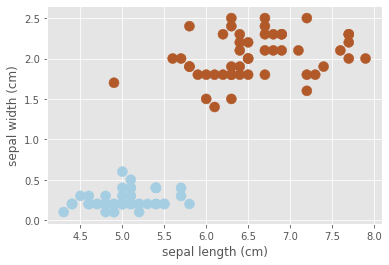

In [33]:
plt.scatter(data[:,0], data[:,3], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

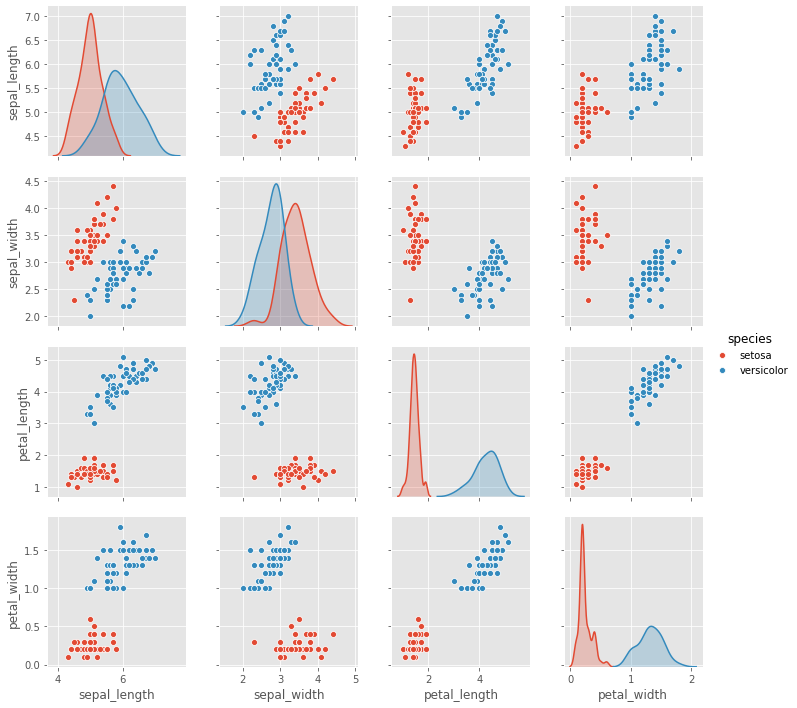

In [34]:
data2 = sns.load_dataset('iris')
idx2 = data2[data2['species'] != 'virginica'] 
sns.pairplot(idx2, hue='species')

From the plot above we can see that the two remaining species are nicely separated in all of the conditions.

We will now split the data into training and test data.

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

In [36]:
lr = cv2.ml.LogisticRegression_create()

In [37]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)
lr.setIterations(100)

In [38]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [39]:
lr.get_learnt_thetas()

array([[-0.06455575, -0.05524445, -0.17825246,  0.32360637,  0.15941882]],
      dtype=float32)

We will now test the accuracy of our classification model:

In [40]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

**Conclusion**

We were able to build a model with a 100% accuracy. Well it's not that impressive, when looking at the scatter plots above. So for the binary task everything seemed fairly easy. Let's see how well it performs, when adding "virginica" to the species category.

## Multiple Classification Problem

Let's do the same scatter plot again and see how it looks when all 3 species are included:

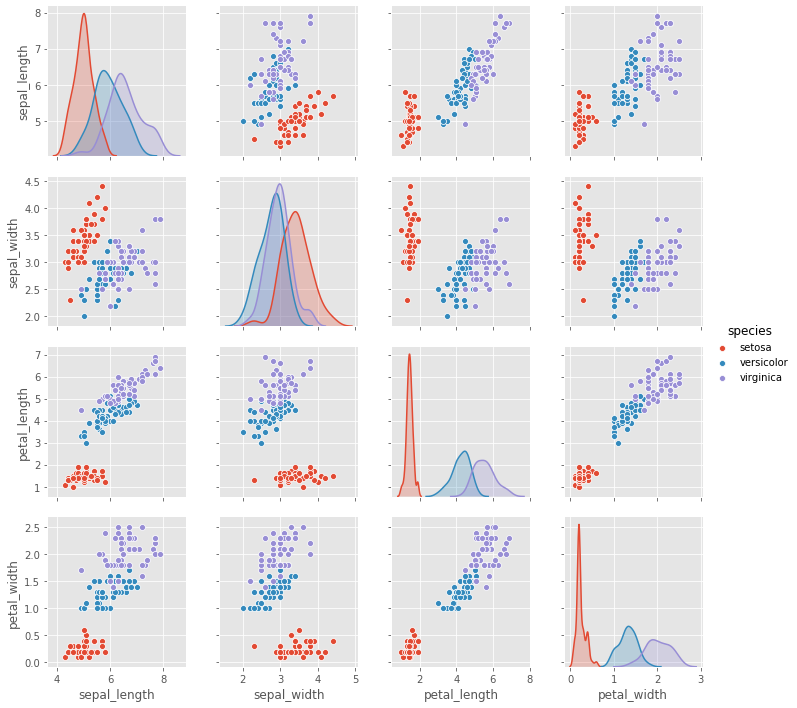

In [41]:
sns.pairplot(data2, hue='species')

We can now see that the distinction between the species is not that clear as it has been before; "setosa" is still different from both other species, but "versicolor" and "virginica" are pretty similar in the *sepal_width* x *spepal_lenght* condition. Also they are overlapping in the peripheral regions.

In [42]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.15, random_state=42)

In [43]:
lr2 = cv2.ml.LogisticRegression_create()

In [44]:
lr2.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr2.setMiniBatchSize(1)
lr2.setIterations(100)

In [45]:
lr2.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [46]:
lr2.get_learnt_thetas()

array([[ 0.02742932, -0.01968516,  0.12355648, -0.29793403, -0.12992284],
       [-0.02961705, -0.07259116, -0.1050695 ,  0.03758729,  0.00538306],
       [-0.07234073, -0.10977867, -0.14317405,  0.17307544,  0.10258793]],
      dtype=float32)

In [47]:
ret, y_pred = lr2.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6086956521739131

**Conclusion**

We are now left with an accuracy of 60% correct classification. It seems we need an algorithm that is more suitable for a better accuracy.